# Analysing and Visualising the dataset

In [1]:
%matplotlib inline 
import matplotlib as mpl 
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf 
import statsmodels.graphics.api as smg 
import pandas as pd 
import numpy as np 
import patsy 
from statsmodels.graphics.correlation import plot_corr 
from sklearn.model_selection import train_test_split 
plt.style.use('seaborn') 

In [2]:
#raw dataset
df=pd.read_csv("Boston.csv")

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [4]:
df.dropna()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [5]:
df.drop_duplicates()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [6]:
df.columns=['crimeRatePerCapita','landOver25K_sqft','non-retailLandProptn','riverDummy','nitrixOxide_pp10m','AvgNo.RoomsPerDwelling','ProptnOwnerOccupied','weightedDist','radialHighwaysAccess','propTaxRate_per10K','pupilTeacherRatio','pctLowerStatus','medianValue_Ks']

In [7]:
df.head()

,crimeRatePerCapita,landOver25K_sqft,non-retailLandProptn,riverDummy,nitrixOxide_pp10m,AvgNo.RoomsPerDwelling,ProptnOwnerOccupied,weightedDist,radialHighwaysAccess,propTaxRate_per10K,pupilTeacherRatio,pctLowerStatus,medianValue_Ks
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
crimeRatePerCapita        506 non-null float64
landOver25K_sqft          506 non-null float64
non-retailLandProptn      506 non-null float64
riverDummy                506 non-null int64
nitrixOxide_pp10m         506 non-null float64
AvgNo.RoomsPerDwelling    506 non-null float64
ProptnOwnerOccupied       506 non-null float64
weightedDist              506 non-null float64
radialHighwaysAccess      506 non-null int64
propTaxRate_per10K        506 non-null int64
pupilTeacherRatio         506 non-null float64
pctLowerStatus            506 non-null float64
medianValue_Ks            506 non-null float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [9]:
df.describe()

,crimeRatePerCapita,landOver25K_sqft,non-retailLandProptn,riverDummy,nitrixOxide_pp10m,AvgNo.RoomsPerDwelling,ProptnOwnerOccupied,weightedDist,radialHighwaysAccess,propTaxRate_per10K,pupilTeacherRatio,pctLowerStatus,medianValue_Ks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [10]:
x=df.pop("crimeRatePerCapita")
y=df



In [11]:
seed=22
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=seed)

In [12]:
train_set=pd.concat([X_train,y_train],axis=1)
test_data = pd.concat([X_test, y_test], axis = 1)

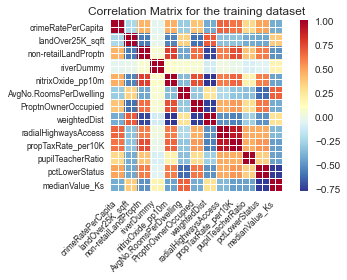

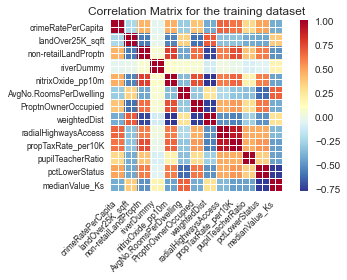

In [13]:
corrmat= train_set.corr(method='pearson')
xnames=list(train_set.columns)
ynames=list(train_set.columns)
plot_corr(corrmat,xnames,ynames,title="Correlation Matrix for the training dataset")

# Graphical investigation of linear relationship

In [14]:
#correlation matrix
train_set.corr(method="pearson")

,crimeRatePerCapita,landOver25K_sqft,non-retailLandProptn,riverDummy,nitrixOxide_pp10m,AvgNo.RoomsPerDwelling,ProptnOwnerOccupied,weightedDist,radialHighwaysAccess,propTaxRate_per10K,pupilTeacherRatio,pctLowerStatus,medianValue_Ks
crimeRatePerCapita,1.000000,-0.234385,0.443516,-0.034296,0.454736,-0.288780,0.389962,-0.415974,0.672119,0.625946,0.310999,0.494354,-0.410017
landOver25K_sqft,-0.234385,1.000000,-0.568845,-0.022227,-0.536165,0.342535,-0.592984,0.689078,-0.334018,-0.325029,-0.411957,-0.430675,0.362143
non-retailLandProptn,0.443516,-0.568845,1.000000,0.066660,0.774706,-0.431180,0.647259,-0.716271,0.594598,0.732884,0.384516,0.604108,-0.496337
riverDummy,-0.034296,-0.022227,0.066660,1.000000,0.096639,0.070266,0.059904,-0.101056,0.013281,-0.011007,-0.081237,-0.046848,0.174240
nitrixOxide_pp10m,0.454736,-0.536165,0.774706,0.096639,1.000000,-0.350309,0.729097,-0.770499,0.601069,0.665836,0.196896,0.595218,-0.441429
AvgNo.RoomsPerDwelling,-0.288780,0.342535,-0.431180,0.070266,-0.350309,1.000000,-0.307056,0.261373,-0.229307,-0.314764,-0.336081,-0.616857,0.677710
ProptnOwnerOccupied,0.389962,-0.592984,0.647259,0.059904,0.729097,-0.307056,1.000000,-0.740343,0.461968,0.521641,0.295007,0.615626,-0.415868
weightedDist,-0.415974,0.689078,-0.716271,-0.101056,-0.770499,0.261373,-0.740343,1.000000,-0.500249,-0.550038,-0.278450,-0.496846,0.270393
radialHighwaysAccess,0.672119,-0.334018,0.594598,0.013281,0.601069,-0.229307,0.461968,-0.500249,1.000000,0.906841,0.473006,0.469495,-0.367521
propTaxRate_per10K,0.625946,-0.325029,0.732884,-0.011007,0.665836,-0.314764,0.521641,-0.550038,0.906841,1.000000,0.466832,0.533799,-0.453980


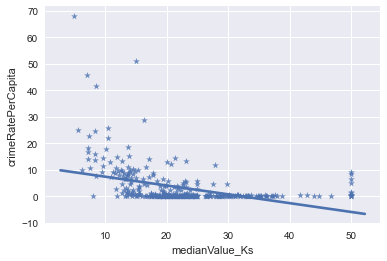

In [15]:
sns.regplot(x="medianValue_Ks",y="crimeRatePerCapita",ci= None, data= train_set, marker= "*")

In [16]:
#Using log function to provide a better fit 
y= np.log(train_set["crimeRatePerCapita"])

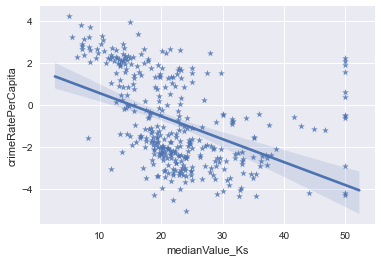

In [17]:
sns.regplot(x="medianValue_Ks",y=y, data= train_set, marker= "*")

## Fitting a Simple Linear Regression Model Using the Statsmodels formula API

In [18]:
import statsmodels.formula.api as smf 
linmodel= smf.ols(formula='crimeRatePerCapita ~ medianValue_Ks', data= train_set)
#ols= ordinary least square

In [19]:
fmodel=linmodel.fit()

In [20]:
print(fmodel.summary())

                            OLS Regression Results                            
Dep. Variable:     crimeRatePerCapita   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     71.13
Date:                Sat, 01 Aug 2020   Prob (F-statistic):           8.73e-16
Time:                        15:15:54   Log-Likelihood:                -1170.4
No. Observations:                 354   AIC:                             2345.
Df Residuals:                     352   BIC:                             2353.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         10.7579      0.949     11.

In [21]:
#now fitting a log-linear model

linmodel1= smf.ols(formula='np.log(crimeRatePerCapita) ~ medianValue_Ks', data= train_set)
ffmodel=linmodel1.fit()
print(ffmodel.summary())

                                OLS Regression Results                                
Dep. Variable:     np.log(crimeRatePerCapita)   R-squared:                       0.208
Model:                                    OLS   Adj. R-squared:                  0.206
Method:                         Least Squares   F-statistic:                     92.41
Date:                        Sat, 01 Aug 2020   Prob (F-statistic):           1.40e-19
Time:                                15:15:54   Log-Likelihood:                -730.78
No. Observations:                         354   AIC:                             1466.
Df Residuals:                             352   BIC:                             1473.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

In [22]:
#fitting Multiple linear models
#we observed from correlation matrix that crimeRatePerCapita is strongly correlated with pctLowerStatus, radialHighwaysAccess, medianValue_Ks, and nitrixOxide_pp10m
mlin= smf.ols(formula="crimeRatePerCapita ~ pctLowerStatus+radialHighwaysAccess+medianValue_Ks+nitrixOxide_pp10m ", data = train_set )
mlinf= mlin.fit()
print(mlinf.summary())

                            OLS Regression Results                            
Dep. Variable:     crimeRatePerCapita   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     85.75
Date:                Sat, 01 Aug 2020   Prob (F-statistic):           1.17e-50
Time:                        15:15:54   Log-Likelihood:                -1081.9
No. Observations:                 354   AIC:                             2174.
Df Residuals:                     349   BIC:                             2193.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.2575 

In [23]:
#fitting log-muliple linear model
mlin1= smf.ols(formula="np.log(crimeRatePerCapita) ~ pctLowerStatus+radialHighwaysAccess+medianValue_Ks+nitrixOxide_pp10m ", data = train_set )
mlinff= mlin1.fit()
print(mlinff.summary())

                                OLS Regression Results                                
Dep. Variable:     np.log(crimeRatePerCapita)   R-squared:                       0.863
Model:                                    OLS   Adj. R-squared:                  0.861
Method:                         Least Squares   F-statistic:                     548.6
Date:                        Sat, 01 Aug 2020   Prob (F-statistic):          4.61e-149
Time:                                15:15:54   Log-Likelihood:                -420.50
No. Observations:                         354   AIC:                             851.0
Df Residuals:                             349   BIC:                             870.3
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------